In [1]:
from __future__ import print_function

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import pywavefront
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

In [2]:
train = pd.read_csv("face.csv")

In [7]:
def roundAxis(data,axis):
    for i in range(data.shape[0]):
        data[i][axis] = int(data[i][axis])
    data = sorted(data, key = lambda x:x[axis])
    return data

In [10]:
label = np.array( train["person"]).reshape(-1,1)
data = np.zeros((label.shape[0],30000,3))
for i in range(data.shape[0]):
    scene = pywavefront.Wavefront("facecap-results/"+ train["filename"][i])
    temp = np.array(scene.vertices[:30000])
    data[i] = roundAxis(temp,0)

(30000, 3)
(30000, 3)
(30000, 3)
(30000, 3)
(30000, 3)
(30000, 3)
(30000, 3)
(30000, 3)
(30000, 3)
(30000, 3)
(30000, 3)
(30000, 3)
(30000, 3)
(30000, 3)
(30000, 3)
(30000, 3)
(30000, 3)
(30000, 3)
(30000, 3)
(30000, 3)
(30000, 3)
(30000, 3)
(30000, 3)
(30000, 3)
(30000, 3)
(30000, 3)
(30000, 3)
(30000, 3)
(30000, 3)
(30000, 3)
(30000, 3)
(30000, 3)
(30000, 3)
(30000, 3)
(30000, 3)
(30000, 3)
(30000, 3)
(30000, 3)
(30000, 3)
(30000, 3)
(30000, 3)
(30000, 3)
(30000, 3)
(30000, 3)
(30000, 3)
(30000, 3)
(30000, 3)
(30000, 3)
(30000, 3)
(30000, 3)
(30000, 3)
(30000, 3)
(30000, 3)
(30000, 3)
(30000, 3)
(30000, 3)
(30000, 3)
(30000, 3)
(30000, 3)
(30000, 3)
(30000, 3)


In [16]:
dat

array([[117.583, 883.024, 100.868],
       [117.583, 887.127, 107.299],
       [117.583, 891.23 , 154.414],
       ...,
       [371.955, 751.736, 496.034],
       [371.955, 755.838, 497.557],
       [371.955, 759.941, 498.29 ]])

In [11]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(30000,3)),
                          keras.layers.Dropout(0.2),
                          keras.layers.Dense(1024, kernel_initializer='normal', activation=tf.nn.sigmoid),
                          keras.layers.Dense(512,kernel_initializer='normal', activation = tf.nn.relu),
                          keras.layers.Dense(128,kernel_initializer='normal', activation = tf.nn.relu),
                          keras.layers.Dense(4, activation=tf.nn.softmax)])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Colocations handled automatically by placer.


In [12]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [13]:
model.fit(data,label,epochs=50)

Epoch 1/50
61/61 [==============================] - 8s 126ms/sample - loss: 2.4282 - acc: 0.1803
Epoch 2/50
61/61 [==============================] - 4s 64ms/sample - loss: 1.4462 - acc: 0.4426
Epoch 3/50
61/61 [==============================] - 4s 60ms/sample - loss: 1.8157 - acc: 0.3934
Epoch 4/50
61/61 [==============================] - 4s 58ms/sample - loss: 1.3627 - acc: 0.3443
Epoch 5/50
61/61 [==============================] - 4s 59ms/sample - loss: 1.3192 - acc: 0.3279
Epoch 6/50
61/61 [==============================] - 5s 75ms/sample - loss: 1.2746 - acc: 0.3934
Epoch 7/50
61/61 [==============================] - 5s 85ms/sample - loss: 1.3052 - acc: 0.3934
Epoch 8/50
61/61 [==============================] - 5s 74ms/sample - loss: 1.2615 - acc: 0.4262
Epoch 9/50
61/61 [==============================] - 4s 73ms/sample - loss: 1.2602 - acc: 0.2787
Epoch 10/50
61/61 [==============================] - 4s 63ms/sample - loss: 1.2320 - acc: 0.4590
Epoch 11/50
61/61 [===================

10000/10000 [==============================] - 1s 56us/step
Test accuracy: 0.8732


9

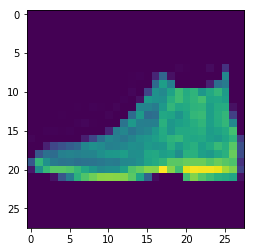